<a href="https://colab.research.google.com/github/nistrate/Statistics/blob/main/Math345_LAB_W8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 1: Difference in sample proportions**

For this problem you will:
1.    Design a function that will take two proportions $\hat{p}_A$ and $\hat{p}_B$, the sample sizes $n_A$ and $n_B$, along with the population size $N_A$ and $N_B$. Your function needs to check if the standart deviation formula for $ \hat{p}_A - \hat{p}_B $ is appropriate to use. Given a positive answer on this check your function describe the distribution of $ \hat{p}_A - \hat{p}_B $ in terms of its *mean*, *standart deviation*, and *shape*.

> Before you code your function list (using words and formulas) all the conditions that will determine the independence of samples from each population and the conditions that will determine that the distripution of $\hat{p}_A- \hat{p}_B$ is Gaussian. 



2.   Once you have the function written, apply it to the following problem: 


> Suppose that $11\%$ of all cars produced by manifacturer $A$ have a ceratin defect and $8\%$ of all cars produced by manifacturer $B$ have this defect. Each month, a you, as a quality control manager takes separate random samples of $300$ of the $4500$ produced cars from each plant. You than consider the difference between the proportions of cars with the defect in each sample, i.e. $ \hat{p}_A - \hat{p}_B $. 
*   Describe the distribution of $ \hat{p}_A - \hat{p}_B $ in terms of its *mean*, *standart deviation*, and *shape*.
*   If the shape is Gaussian, plot the probability distribution functions with the computed quantities 








In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Problem 1: Difference in sample proportions

def gaussian(x, mu, sigma):
    f_x = (1 / np.sqrt(2*np.pi*sigma*sigma) ) * np.exp( - (x - mu)*(x - mu) / (2*sigma*sigma) ) 
    return f_x

def diff_proportion(p_A, p_B, n_A, n_B, N_A, N_B):

    # checking the "10% condition" for independent samples
    p_treshold = 0.1 # 10% threshold 

    if n_A / N_A > p_treshold:
        print ("We cannot assume independence of samples from population A.")

        if n_B / N_B > p_treshold:
            print ("We cannot assume independence of samples from population B.")
        
        p_dif = None
        sigma_dif = None
        shape_dif = None

        return p_dif, sigma_dif, shape_dif

    elif n_A / N_A <= p_treshold and n_B / N_B <= p_treshold:
        p_dif = p_A - p_B
        sigma_dif = np.sqrt( (p_A*(1-p_A))/n_A  + (p_B*(1-p_B))/n_B )
        
        # shape condition
        shape_threshold = 10
        if n_A*p_A >= shape_threshold and n_A*(1-p_A) >= shape_threshold and n_B*p_B >= shape_threshold and n_B*p_B >= shape_threshold: # checking for 10 successes and 10 failures in both samples -> gaussian distribution
            shape_dif = 'Gaussian'

            plt.figure(figsize = (10,10))
            x_line = np.arange(p_dif - 4*sigma_dif, p_dif + 4*sigma_dif, 0.0001)
            plt.plot(x_line, gaussian(x_line, p_dif, sigma_dif), '-.', color = 'chocolate', linewidth = 4, label = '$\hat{p}_{A}-\hat{p}_{B}$')
            plt.legend()
            plt.title('Difference in Sample\nGaussian Distribution')
            plt.xlabel( 'x' )
            plt.ylabel( 'Difference in Sample' )

            plt.show()

        else:
            shape_dif = 'Not Gaussian'

    return p_dif, sigma_dif, shape_dif


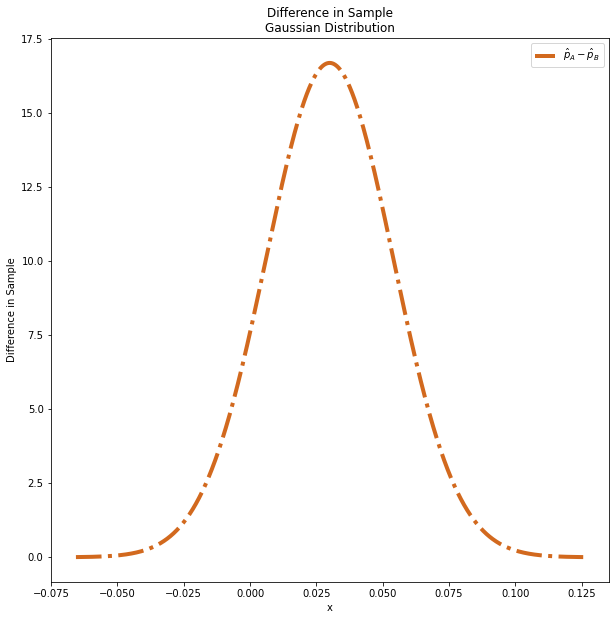

p_C = 0.03
sigma_C = 0.024
The shape of the difference distribution is Gaussian


In [3]:
p_C, sigma_C, shape = diff_proportion(p_A = 0.11, p_B = 0.08, n_A = 300, n_B = 300, N_A = 4500, N_B = 4500)

print(f"p_C = {np.round(p_C,3)}")
print(f"sigma_C = {np.round(sigma_C,3)}")
print(f"The shape of the difference distribution is {shape}")


$\chi^2 = \sum{\frac{(observed-expected)^2}{expected}}$

**Problem 2:  $\chi^2_{df}$ test: goodness of fit**

Assume that you want to buy a restaurant and your major point of concern is the daily influx of people that get dinner at the restaurant.  You have asked the current owner to give you the information about the influx of customers and he provided the following data:

Mon - $10 \%$ of weekly customers \\
Tue - $8 \%$ of weekly customers \\
Wed - $14 \%$ of weekly customers \\
Thu - $11 \%$ of weekly customers \\
Fri - $42 \%$ of weekly customers \\
Sat - $15 \%$ of weekly customers \\

Since you are a student of statistics, you decided to check the data by measuring the number of customers during a week. This is the data you gathered:  

Mon - $22$  customers \\
Tue - $33$  customers \\
Wed - $26$  customers \\
Thu - $28$  customers \\
Fri - $75$  customers \\
Sat - $26$  customers \\

Specify the number of degrees of freedom and perform a hypothesis test using the appropriate $\chi^2_{df}$ distribution with $\alpha = 5\%$.

Clearly state your null and alternative hypothesis and given the result of your test determine if you should trust the data provided the current owner?

In [5]:
from scipy.stats import chisquare, chi2
from math import gamma
import numpy as np

#from google.colab import files 
from scipy.integrate import quad
alpha  = 0.05

expected_percentage = [0.10, 0.08, 0.14, 0.11, 0.42, 0.15]

observed = [22, 33, 26, 28, 75, 26]
N_cust = np.sum(observed) # total number of customers that week

expected = [x*N_cust for x in expected_percentage] # expected number of daily custumers

# def chi_sq(x, df): # chi square prob desnity function
#   return 1 / (2*math.gamma(df/2)) * (x/2)**(df/2-1) * np.exp(-x/2)

# chi_sq_val = np.sum( [(x-y)*(x-y)/y for x,y in zip(observed,expected)] ) # chi_squared
# dof = len(observed) - 1

# # alternatively one can use a for loop
# # chi_sq_val = 0
# # for i in range (len(expected)):
# #     chi_sq_val += (observed[i] - expected[i])*(observed[i] - expected[i])/expected[i]

# p_val_int = quad(chi_sq, chi_sq_val, np.infty, args=(dof))[0]
# print(p_val_int)

# if p_val_int > alpha:
#     print('Accept H0.')
# else:
#     print('Reject H0.')


#this is teh easy way witout having to deal with integrating chi_sq distribution

chi_sq, p_val = chisquare(observed, expected) #

if p_val > alpha:
    print('Accept H0.')
else:
    print('Reject H0.')

Reject H0.


**Problem 3:  $\chi^2_{df}$ test: independence**

Here you will work with the IBM HR Analytics Dataset -  the IBM Employee Attrition & Performance dataset. 

https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

From here you will select two categorical variables and check if they are independent of each other using hypothesis testing. In order to compute the $\chi^2$ test statistic, you will need to construct a contingency table of the two categorical values, the function `pd.crosstab()` might be useful.

Clearly state your null and alterantive hypothesis, your value for $\alpha$, and formulate a conclusion given your result. 

  

In [6]:
#from google.colab import files 
import pandas as pd

#uploaded = files.upload()

In [7]:
df = pd.read_csv('./Datasets/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [8]:
df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [9]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

For our Chi-square test for independence here, the null hypothesis is that there is no significant relationship between 'BusinessTravel' and 'Gender'.
The alternative hypothesis is that there is significant relationship between 'BusinessTravel' and 'Gender'.

In [10]:
ct = pd.crosstab(df.Attrition, df.BusinessTravel, margins=True)
ct

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely,All
Attrition,,,,
No,138,208,887,1233
Yes,12,69,156,237
All,150,277,1043,1470


In [11]:
ct.shape

(3, 4)

In [12]:
 # compute all the expected numbers
row_sum = ct.iloc[0:2,3].values
expected = []

for j in range(2):
    for val in ct.iloc[2,0:3].values:
        expected.append(val*row_sum[j]/ct.loc['All', 'All'])

observed = []

for j in range(2):
    for i in range(3):
        observed.append(ct.iloc[j,i])

        chi_sq_stats = np.sum([(x-y)**2/y for x,y in zip(observed,expected)])


dof = (len(row_sum)-1)*(len(ct.iloc[2,0:3].values)-1)

p_value = chi2.sf(chi_sq_stats, dof) 

if p_val > alpha:
    print('Accept H0.')
else:
    print('Reject H0.')

Reject H0.
